In [228]:
import pandas as pd
import numpy as np
crypto = pd.read_csv('Coins.csv', sep = '\t', header = None, names = ['Name', 'Symbol', 'MCap', 'Price', 'Vol', 'CSupply', 'DayChg'])

In [229]:
crypto.shape

(1342, 7)

In [230]:
#turn ?'s into NA's
crypto2 = crypto.replace(to_replace= '?',value=np.nan)

In [231]:
np.sum(crypto2.isnull())
mask = crypto2.isnull().any(axis=1)
crypto2.loc[mask,:].shape  #Find coins without data

(243, 7)

In [232]:
crypto2 = crypto2.dropna() #Remove crypto without information

In [233]:
crypto2['MCap'] = crypto2['MCap'].astype(float) #change type to float

In [234]:
crypto_sorted = crypto2.sort_values(['MCap'], ascending = False)

In [235]:
crypto_sorted = crypto_sorted.reset_index()
type(crypto_sorted)

pandas.core.frame.DataFrame

In [236]:
crypto = crypto_sorted.iloc[:,1:8]

In [237]:
crypto['Price'] = crypto['Price'].astype(float)

In [238]:
crypto['CSupply'] = crypto['CSupply'].astype(float)

In [239]:
crypto['DayChg'] = crypto['DayChg'].astype(float)

In [240]:
crypto = crypto[crypto.astype(str).ne('None').all(1)]

In [241]:
crypto['Vol'] = crypto['Vol'].astype(float)

In [242]:
crypto.shape

(1089, 7)

In [243]:
crypto['Vol'].describe() #problem in volume, some are not trading

count    1.089000e+03
mean     2.260571e+07
std      2.871127e+08
min      0.000000e+00
25%      1.292850e+03
50%      1.902900e+04
75%      4.202040e+05
max      7.430620e+09
Name: Vol, dtype: float64

In [244]:
crypto['NoVol'] = crypto['Vol'] == 0 #Remove columns with volume is 0

In [245]:
crypto = crypto[crypto['NoVol'] == False] 

In [246]:
crypto = crypto.iloc[:,:7] #remove boolean test on volume

In [247]:
crypto.describe() #check for empty volumes

,MCap,Price,Vol,CSupply,DayChg
count,1.081000e+03,1081.000000,1.081000e+03,1.081000e+03,1081.000000
mean,3.739006e+08,1134.019691,2.277300e+07,8.832790e+09,-3.335227
std,5.131161e+09,26522.151486,2.881675e+08,1.189271e+11,32.144395
min,9.938719e+00,0.000003,1.884260e-01,7.826400e-02,-51.170000
25%,5.955331e+05,0.022557,1.354520e+03,6.651808e+06,-10.560000
50%,5.656046e+06,0.147443,1.959520e+04,3.033334e+07,-5.860000
75%,2.951783e+07,0.867038,4.314040e+05,1.578613e+08,-1.010000
max,1.403039e+11,814542.000000,7.430620e+09,2.714466e+12,665.900000


In [248]:
crypto = crypto.sort_values(['Price'], ascending = False)
crypto = crypto.drop([780,1072,642])

In [249]:
crypto = crypto.sort_values(['MCap'], ascending = False)

In [250]:
crypto = crypto.reset_index()

In [251]:
crypto = crypto.iloc[:,1:8] #Remove Index again

In [255]:
crypto['MCap'] = crypto['MCap']/1000000000

In [253]:
%matplotlib inline 
from matplotlib import pyplot as plt
plt.style.use('ggplot') #plot

In [256]:
P = crypto['Price']
M = crypto['MCap']
V = crypto['Vol']
C = crypto['CSupply']

First = crypto['MCap'].max()
First_name = crypto.loc[crypto.MCap == First, 'Name'].tolist()[0]
First_price = crypto.loc[crypto.MCap == First, 'Price']

Second = crypto['MCap'][1] #second largest MCap
Second_name = crypto.loc[crypto.MCap == Second, 'Name'].tolist()[0]
Second_price = crypto.loc[crypto.MCap == Second, 'Price']

Third = crypto['MCap'][2] #third largest MCap
Third_name = crypto.loc[crypto.MCap == Third, 'Name'].tolist()[0]
Third_price = crypto.loc[crypto.MCap == Third, 'Price']

Fourth = crypto['MCap'][3] #fourth largest MCap
Fourth_name = crypto.loc[crypto.MCap == Fourth, 'Name'].tolist()[0]
Fourth_price = crypto.loc[crypto.MCap == Fourth, 'Price']

Fifth = crypto['MCap'][4] #Fifth largest MCap
Fifth_name = crypto.loc[crypto.MCap == Fifth, 'Name'].tolist()[0]
Fifth_price = crypto.loc[crypto.MCap == Fifth, 'Price']

Text(0.385368,9.99146,'   Cardano  ')

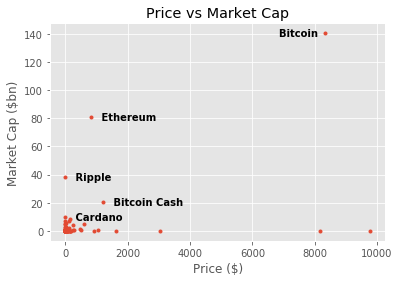

In [258]:
plt.plot(P, M, '.')
plt.xlabel('Price ($)')
plt.ylabel('Market Cap ($bn)')
plt.title('Price vs Market Cap')
plt.text(First_price, First, '%s  ' %(First_name),
         color = 'black', size = 10, fontweight = 'bold', 
         verticalalignment = 'center', horizontalalignment = 'right')
plt.text(Second_price, Second, '   %s  ' %(Second_name),
         color = 'black', size = 10, fontweight = 'bold', 
         verticalalignment = 'center', horizontalalignment = 'left')
plt.text(Third_price, Third, '   %s  ' %(Third_name),
         color = 'black', size = 10, fontweight = 'bold', 
         verticalalignment = 'center', horizontalalignment = 'left')
plt.text(Fourth_price, Fourth, '   %s  ' %(Fourth_name),
         color = 'black', size = 10, fontweight = 'bold', 
         verticalalignment = 'center', horizontalalignment = 'left')
plt.text(Fifth_price, Fifth, '   %s  ' %(Fifth_name),
         color = 'black', size = 10, fontweight = 'bold', 
         verticalalignment = 'center', horizontalalignment = 'left')

In [265]:
#Not all the coins have massive market caps
#Of the 1,078 coins, the vast majority are below $10mn
crypto.shape

(1078, 7)

Text(0.5,1,'Histogram of Coins with Market Cap Below $10mn')

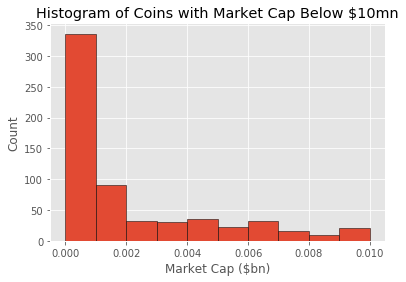

In [261]:
plt.hist(crypto['MCap'][crypto.MCap <= 0.01], bins= 10, edgecolor = 'k')
plt.xlabel('Market Cap ($bn)')
plt.ylabel('Count')
plt.title('Histogram of Coins with Market Cap Below $10mn')

In [262]:
#Let's look at only the largest coins outstanding
Top = crypto[crypto['MCap'] > 1] #W/ market caps above $1bn
Top.index = Top['Name']
Top = Top.iloc[:,1:7]

Text(0.5,1,'Top 10 Crypto Currencies')

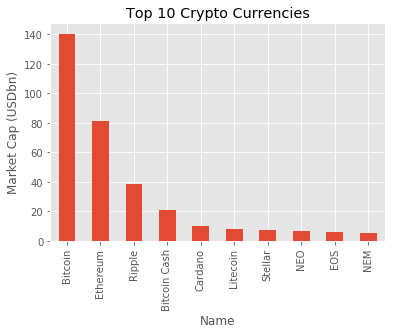

In [264]:
Top['MCap'].sort_values(ascending = False).head(10).plot.bar()
plt.ylabel('Market Cap (USDbn)')
plt.title('Top 10 Crypto Currencies')